In [1]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Import data

In [3]:
df = pd.read_csv('../../datasets/Conventional.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,117454,429518,5554
1,2015-01-11,110974,427723,5358
2,2015-01-18,151977,500684,4225
3,2015-01-25,140914,422435,4945
4,2015-02-01,217716,608156,5736


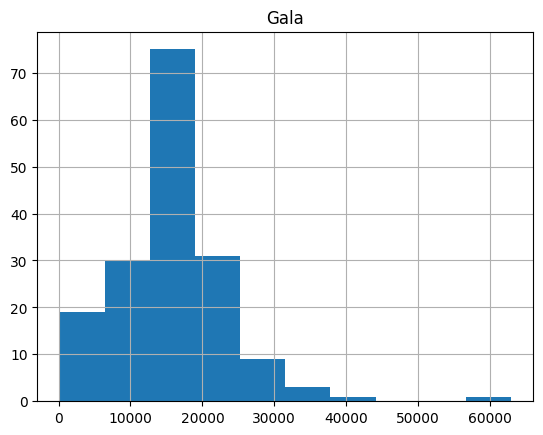

In [4]:
data = df[['Gala']]
data.hist();

## window shift 26 columns

In [5]:
seq_df = window_input_output(26, 26, data)
seq_df

,Gala,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
51,19104,24478.0,29349.0,8808.0,14146.0,18216.0,20029.0,12294.0,8551.0,11222.0,...,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0,4225.0,5358.0,5554.0
52,10375,19104.0,24478.0,29349.0,8808.0,14146.0,18216.0,20029.0,12294.0,8551.0,...,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0,4225.0,5358.0
53,37684,10375.0,19104.0,24478.0,29349.0,8808.0,14146.0,18216.0,20029.0,12294.0,...,8461.0,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0,4225.0
54,31010,37684.0,10375.0,19104.0,24478.0,29349.0,8808.0,14146.0,18216.0,20029.0,...,4760.0,8461.0,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0
55,15455,31010.0,37684.0,10375.0,19104.0,24478.0,29349.0,8808.0,14146.0,18216.0,...,6309.0,4760.0,8461.0,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,14153,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,14102.0,8951.0,11714.0,...,17251.0,23984.0,22772.0,23776.0,23358.0,22582.0,20053.0,19725.0,18700.0,18348.0
165,15527,14153.0,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,14102.0,8951.0,...,18081.0,17251.0,23984.0,22772.0,23776.0,23358.0,22582.0,20053.0,19725.0,18700.0
166,16599,15527.0,14153.0,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,14102.0,...,16549.0,18081.0,17251.0,23984.0,22772.0,23776.0,23358.0,22582.0,20053.0,19725.0
167,15484,16599.0,15527.0,14153.0,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,...,24390.0,16549.0,18081.0,17251.0,23984.0,22772.0,23776.0,23358.0,22582.0,20053.0


## Split data

In [6]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Gala')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [7]:
model = ElasticNet()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score 

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Gala):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Gala):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Gala): 35192312.897188954
Mean Absolute Error (Gala): 4903.740811221365
R-squared (Test score) -1.5183243902007197
Train score 0.18657383265657027


## Visualization

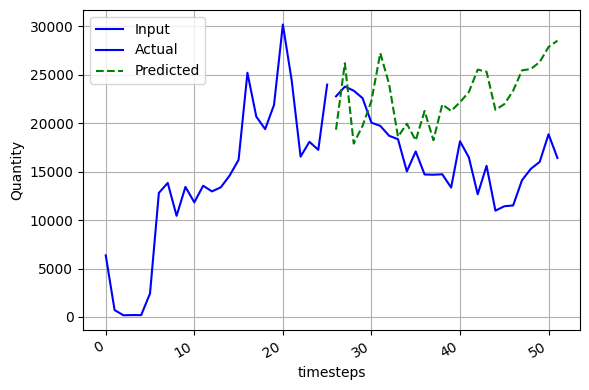

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 26, 1), X_test.iloc[1, ], 'b-', label='Input')
ax.plot(np.arange(26, 52, 1), y_test.iloc[1, ], color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

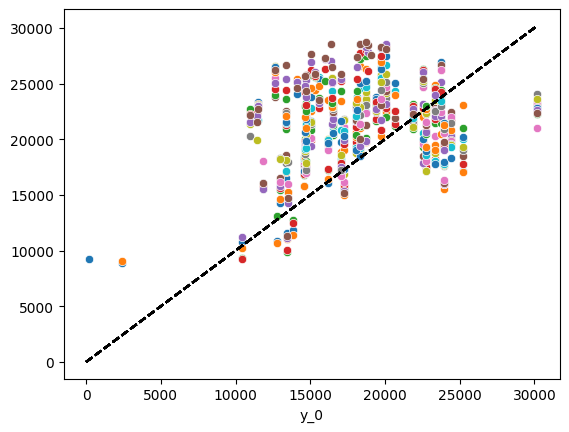

In [10]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')